# Data Science Radix

## Introdução

In [1]:
# Importando Bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from IPython.display import HTML

In [2]:
# Mudando o estilo e o tema dos gráficos

sns.set_style(style='darkgrid')
sns.set_palette('Accent')

In [3]:
# Abrindo um arquivo CSV com o Pandas

df = pd.read_csv("https://raw.githubusercontent.com/oarthurcarvalho/data-science-radix/master/qualidade_do_ar.csv",
                 encoding = "UTF-8", sep = ";", header = 0,
                 na_values=-200, parse_dates=['Date'],
                 decimal = ',',
                 dayfirst = True)
df.dtypes

Date             datetime64[ns]
Time                     object
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [4]:
df.head()

,Date,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18.00.00,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19.00.00,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20.00.00,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21.00.00,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22.00.00,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [5]:
df.shape

(9357, 14)

In [6]:
df.describe().round(2)

,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8991.00,914.00,8991.00,8991.00,7718.00,8991.00,7715.00,8991.00,8991.00,8991.00,8991.00,8991.00
mean,1099.83,218.81,10.08,939.15,246.90,835.49,113.09,1456.26,1022.91,18.32,49.23,1.03
std,217.08,204.46,7.45,266.83,212.98,256.82,48.37,346.21,398.48,8.83,17.32,0.40
min,647.00,7.00,0.10,383.00,2.00,322.00,2.00,551.00,221.00,-1.90,9.20,0.18
25%,937.00,67.00,4.40,734.50,98.00,658.00,78.00,1227.00,731.50,11.80,35.80,0.74
50%,1063.00,150.00,8.20,909.00,180.00,806.00,109.00,1463.00,963.00,17.80,49.60,1.00
75%,1231.00,297.00,14.00,1116.00,326.00,969.50,142.00,1674.00,1273.50,24.40,62.50,1.31
max,2040.00,1189.00,63.70,2214.00,1479.00,2683.00,340.00,2775.00,2523.00,44.60,88.70,2.23


## Tratamento de Valores Faltantes

In [7]:
(df.isna().sum() / df.shape[0]).round(decimals=3) * 100

Date              0.0
Time              0.0
PT08.S1(CO)       3.9
NMHC(GT)         90.2
C6H6(GT)          3.9
PT08.S2(NMHC)     3.9
NOx(GT)          17.5
PT08.S3(NOx)      3.9
NO2(GT)          17.5
PT08.S4(NO2)      3.9
PT08.S5(O3)       3.9
T                 3.9
RH                3.9
AH                3.9
dtype: float64

Adotei 3 estratégias para o tratamento do valores faltantes. As estratégias foram as seguintes:
1. A coluna 'NMHC(GT)' tem apenas de 20% dos dados, a decisão foi por exclui-lá uma vez que completar certamente nos levaria a um um resultado diferente do real.
2. Para a coluna da variável de interesse, optei por excluir apenas as linhas que continha valores nulos.
3. Para as outras colunas, completei com a média de cada coluna. Isso irá alterar a distribuição das variaveis mas poderemos ver na fase de modelagem se se provou uma escolha acertada ou não.

In [8]:
# Exclusão da coluna NMHC(GT)
df.drop(columns=['NMHC(GT)'], axis=1, inplace=True)

In [9]:
# Eliminação das linhas nulas da coluna PT08.S1(CO)
df.dropna(axis = 0, subset=['PT08.S1(CO)'], inplace=True)

In [10]:
df_completo = df.fillna(df.mean())
(df_completo.isna().sum() / df_completo.shape[0]).round(decimals=3) * 100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


Date             0.0
Time             0.0
PT08.S1(CO)      0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
dtype: float64

## Concentração de Monóxido de Carbono ás Quartas-Feiras


In [11]:
df_completo['Dia da Semana'] = df_completo['Date'].dt.dayofweek
df_completo.head()


,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Dia da Semana
0,2004-03-10,18.00.00,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2
1,2004-03-10,19.00.00,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2
2,2004-03-10,20.00.00,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2
3,2004-03-10,21.00.00,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2
4,2004-03-10,22.00.00,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2


In [12]:
dados_quarta_feira = df_completo[df_completo['Dia da Semana'] == 2]
concentracao_CO = dados_quarta_feira.groupby('Time').mean().round(decimals = 2)['PT08.S1(CO)']

Text(0, 0.5, 'Concentração de CO')

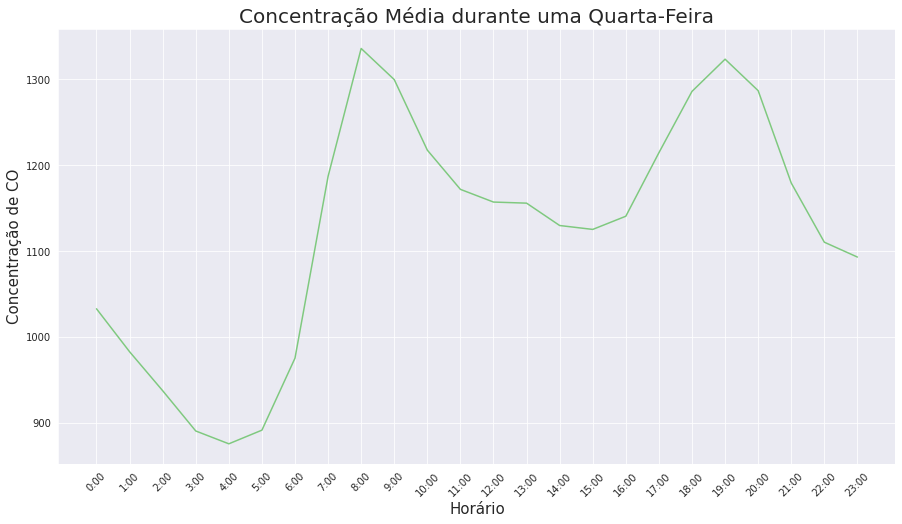

In [13]:
plt.figure(figsize = (15,8))
ax = sns.lineplot(data = concentracao_CO, x = concentracao_CO.index,
                  y = concentracao_CO.values)
ax.set_title("Concentração Média durante uma Quarta-Feira", fontsize = 20)
ax.set_xticklabels(labels = [f'{i}:00' for i in range(34)], rotation = 45)
ax.set_xlabel('Horário', fontsize = 15)
ax.set_ylabel('Concentração de CO', fontsize = 15)

Pelo Gráfico, podemos ver que os horários de maior concentração de CO em uma Quarta-Feira são os horário de **8:00** e às **19:00**.

## Interferência das Estações do Ano na concentração de CO

In [14]:
df_completo.head()

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Dia da Semana
0,2004-03-10,18.00.00,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2
1,2004-03-10,19.00.00,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2
2,2004-03-10,20.00.00,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2
3,2004-03-10,21.00.00,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2
4,2004-03-10,22.00.00,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2


In [15]:
# df_completo[df_completo['Date'] >= '2004-03-10' & df_completo['Date'] < '2004-03-10']
dados_ano = df_completo[(df_completo['Date'] >= '2004-03-10') & (df_completo['Date'] < '2005-03-10')]
dados_ano.head()

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Dia da Semana
0,2004-03-10,18.00.00,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2
1,2004-03-10,19.00.00,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2
2,2004-03-10,20.00.00,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2
3,2004-03-10,21.00.00,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2
4,2004-03-10,22.00.00,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2


In [16]:
temperatura_por_dia = dados_ano.groupby(by=['Date']).mean()['T'].reset_index()

Text(0, 0.5, 'Temperatura (C)')

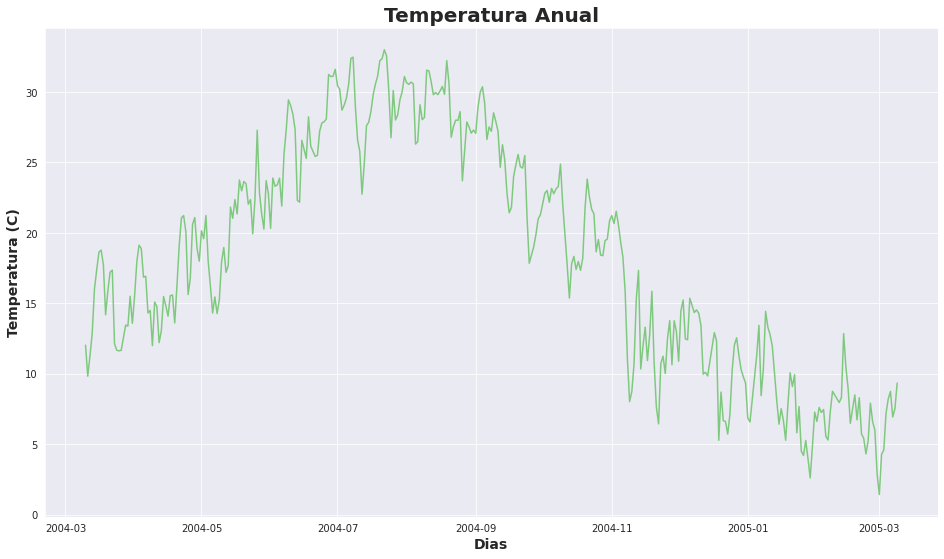

In [17]:
ax = sns.lineplot(data = temperatura_por_dia, x='Date', y = 'T')
ax.figure.set_size_inches(16,9)
ax.set_title('Temperatura Anual', fontsize = 20, fontweight='bold')
ax.set_xlabel('Dias', fontsize= 14, fontweight= 'bold')
ax.set_ylabel('Temperatura (C)', fontsize= 14, fontweight= 'bold')

Pelo gráfico de temperatura ao longo do ano, podemos perceber uma temperatura maior no meio do ano e menores temperatura no fim e no inicoi do ano. O que nos leva a crer que estas medições foram feita em algum lugar no hemisfério Norte.

In [18]:
def season(date):
    if date >= pd.Timestamp(year= 2004, month=3, day=20) and date < pd.Timestamp(year=2004, month=6, day=20):
        return 'Primavera'
    elif date >= pd.Timestamp(year=2004, month=6, day=20) and date < pd.Timestamp(year=2004, month= 9, day=22):
        return 'Verão'
    elif date >= pd.Timestamp(year=2004, month=9, day=22) and date < pd.Timestamp(year=2004, month=12, day=21):
        return 'Outono'
    elif date >= pd.Timestamp(year=2004, month=12, day=21) and date < pd.Timestamp(year=2005, month=3, day=20):
        return 'Inverno'
    else:
        return 'Inverno'

In [19]:
concentracao_CO_estacao = df_completo.groupby(by=['Date']).mean().reset_index()[['Date', 'PT08.S1(CO)']]
concentracao_CO_estacao

,Date,PT08.S1(CO)
0,2004-03-10,1316.500000
1,2004-03-11,1244.166667
2,2004-03-12,1281.666667
3,2004-03-13,1330.666667
4,2004-03-14,1361.125000
...,...,...
378,2005-03-31,1008.125000
379,2005-04-01,903.291667
380,2005-04-02,890.958333
381,2005-04-03,981.375000


In [20]:
concentracao_CO_estacao['Estacao'] = concentracao_CO_estacao['Date'].apply(season)
concentracao_CO_estacao.head()

,Date,PT08.S1(CO),Estacao
0,2004-03-10,1316.500000,Inverno
1,2004-03-11,1244.166667,Inverno
2,2004-03-12,1281.666667,Inverno
3,2004-03-13,1330.666667,Inverno
4,2004-03-14,1361.125000,Inverno


## Correlação entre as Variáveis

Text(0.5, 1.0, 'Correlação das Variáveis do Dataset')

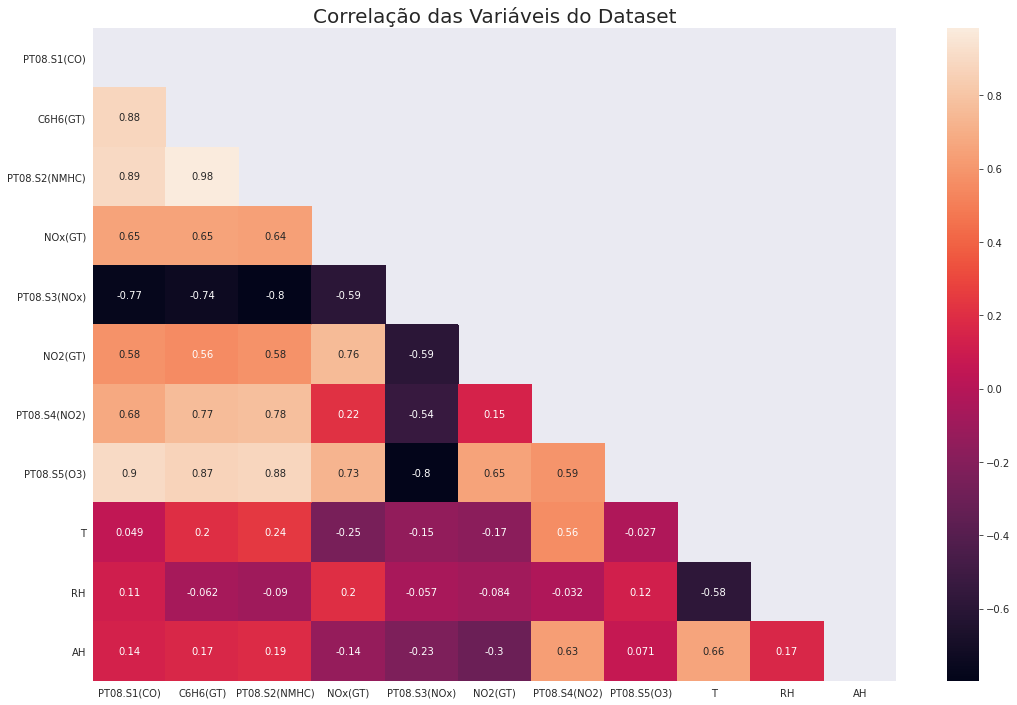

In [21]:
# Calculando as Correlações da Variáveis com PT08.S1(CO).

mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(18,12))
correlacao = sns.heatmap(df_completo[['PT08.S1(CO)', 'C6H6(GT)', 
                                      'PT08.S2(NMHC)', 'NOx(GT)', 
                                      'PT08.S3(NOx)', 'NO2(GT)', 
                                      'PT08.S4(NO2)', 'PT08.S5(O3)',
                                      'T', 'RH', 'AH']].corr(), 
                         annot=True, mask = mask)
correlacao.set_title('Correlação das Variáveis do Dataset', fontsize=20)

<strong><p>'PT08.S5(O3)', 'C6H6(GT)' e 'PT08.S2(NMHC)' têm uma forte correlação com 'PT08.S1(CO)' (Variável Dependente)</p></strong>
<p>Há também uma fortíssima correlação entre as variáveis 'PT08.S5(O3)' e 'C6H6(GT)'. Ao modelarmos a regressão, veremos o quanto estas variáveis influenciam.</p>

## Comportamento da Variável Dependente (Y)

### Análises Gráficas

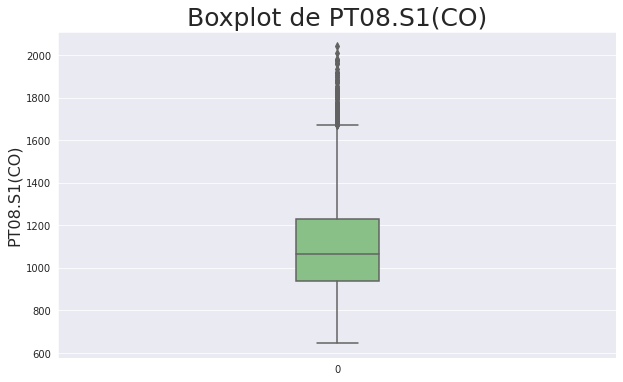

In [22]:
ax = sns.boxplot(data=df_completo['PT08.S1(CO)'], orient='v', width= 0.15,)
ax.figure.set_size_inches(10,6)
ax.set_title('Boxplot de PT08.S1(CO)', fontsize = 25)
ax.set_ylabel('PT08.S1(CO)', fontsize = 16)
ax

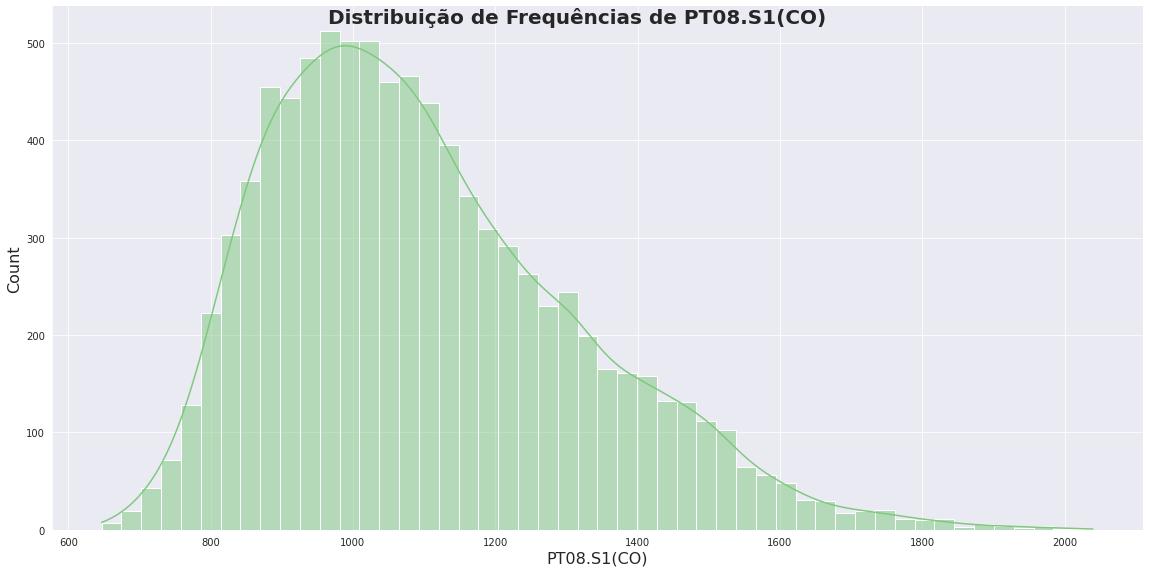

In [23]:
g = sns.displot(data=df_completo['PT08.S1(CO)'], height=8, aspect=2, kde=True)
g.fig.suptitle("Distribuição de Frequências de PT08.S1(CO)", fontsize=20, fontweight='bold')
g.set_xlabels('PT08.S1(CO)', fontsize = 16)
g.set_ylabels('Count', fontsize = 16)
g

<p>Podemos ver pelo boxplot que não há uma simetria na distribuição da nosso variável dependente (PT08.S1(CO)). Nota-se pela assimetria entre os bigodes e a mediana não divide o quadrado em duas partes iguais. Olhando a distribuição, notamos que trata-se de uma distribuição assimétrica à direita. Precisamos aplicar uma transformação para podermos </p>
<p>Outro importante ponto a se destacar é a presença de outliers. Trataremos dele mais à frente, durante a fase de implementação do modelo.</p>

# Transformação das Variáveis

<p>Como a distribuição de PT08.S1(CO) é assimétrica à direita. Utilizaremos a transformação logarítmica para que possamos tornar a distribuição parecida com a normal.</p>
<p>Para que possamos aplicar esta tranformação, devemos verificar se não há alguma feature não tem valores iguais a 0. Para as features que apresentarem este problema, adicionaremos um offset para que não caia neste problema</p>

In [24]:
lista_colunas = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
                 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
                 'PT08.S5(O3)', 'T', 'RH', 'AH']

In [25]:
df_completo[lista_colunas].describe()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,1099.833166,10.083105,939.153376,242.189292,835.493605,112.145137,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,217.080037,7.449820,266.831429,187.117216,256.817320,43.189073,346.206794,398.484288,8.832116,17.316892,0.403813
min,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,937.000000,4.400000,734.500000,112.000000,658.000000,85.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1063.000000,8.200000,909.000000,227.000000,806.000000,112.145137,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,1231.000000,14.000000,1116.000000,280.000000,969.500000,132.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [26]:
df_teste = df_completo.copy()
for coluna in lista_colunas:
    if coluna == 'T':
        # df_teste[f'log_{coluna}'] = np.log(df_completo[coluna] + 2.9)
        df_teste[f'log_{coluna}'] = df_completo[coluna] + 2.9
    else:
        df_teste[f'log_{coluna}'] = np.log(df_completo[coluna] + 1)

In [27]:
df_teste.head()

,Date,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Dia da Semana,log_PT08.S1(CO),log_C6H6(GT),log_PT08.S2(NMHC),log_NOx(GT),log_PT08.S3(NOx),log_NO2(GT),log_PT08.S4(NO2),log_PT08.S5(O3),log_T,log_RH,log_AH
0,2004-03-10,18.00.00,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2,7.215975,2.557227,6.953684,5.117994,6.963190,4.736198,7.434257,7.145984,16.5,3.910021,0.564063
1,2004-03-10,19.00.00,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2,7.164720,2.341806,6.862758,4.644391,7.069023,4.532599,7.352441,6.880384,16.2,3.885679,0.545517
2,2004-03-10,20.00.00,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2,7.246368,2.302585,6.845880,4.882802,7.039660,4.744932,7.349874,6.980076,14.8,4.007333,0.559730
3,2004-03-10,21.00.00,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2,7.227662,2.322388,6.855409,5.153292,6.996681,4.812184,7.368340,7.093405,13.9,4.110874,0.580370
4,2004-03-10,22.00.00,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2,7.149132,2.014903,6.729824,4.882802,7.095064,4.762174,7.307202,7.013016,14.1,4.104295,0.581545


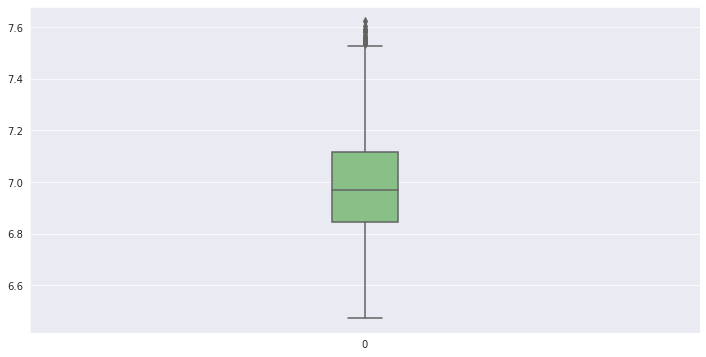

In [28]:
ax = sns.boxplot(data=df_teste['log_PT08.S1(CO)'], width=0.1)
ax.figure.set_size_inches(12,6)

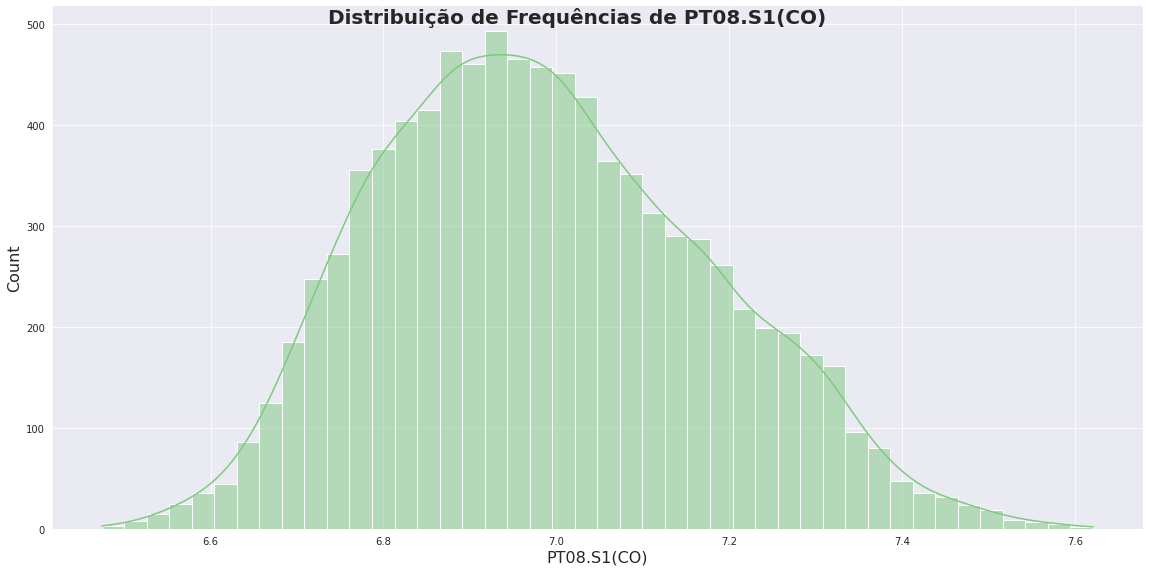

In [29]:
g = sns.displot(data = df_teste['log_PT08.S1(CO)'], height=8, aspect=2, kde=True)
g.fig.suptitle("Distribuição de Frequências de PT08.S1(CO)", fontsize=20, fontweight='bold')
g.set_xlabels('PT08.S1(CO)', fontsize = 16)
g.set_ylabels('Count', fontsize = 16)
g

<p>Podemos ver, tanto pelos dois gráficos anteriores que a distribuição está mais parecido com uma curva normal (em sino).</p>
<p>Olhando para o gráfico de boxplot podemos notar que, mesmo com a transformação, há ainda outliers</p>
<p>Com esta transformação podemos seguir para o desenvolvimento do modelo de Regressão Linear.</p>

<p>Para a remoção dos outliers utilizaremos as técnicas do Intervalo interquartil. A técnica está explicada na imagem abaixo:</p>
<center><img width = 500px src="https://www.monolitonimbus.com.br/wp-content/webp-express/webp-images/doc-root/wp-content/uploads/2019/11/boxplot_horiz.png.webp" alt="Técnica do Intervalo Interquartil"></center>

In [30]:
# Calculando o intervalo interquartil
IIQ = df_teste['log_PT08.S1(CO)'].quantile(0.75) - df_teste['log_PT08.S1(CO)'].quantile(0.25)

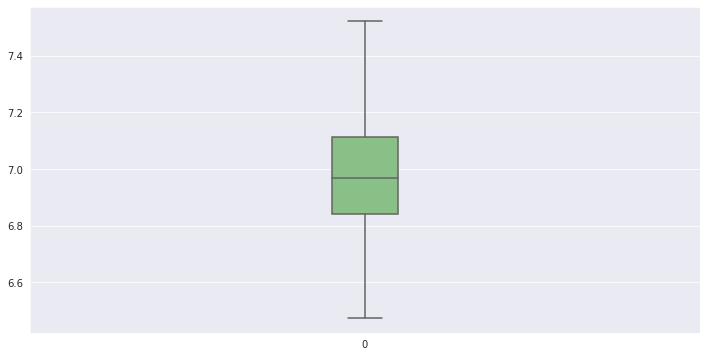

In [31]:
df_sem_outliers = df_teste[df_teste['log_PT08.S1(CO)'] < df_teste['log_PT08.S1(CO)'].quantile(0.75) + (1.495 * IIQ)]
ax = sns.boxplot(data=df_sem_outliers['log_PT08.S1(CO)'], width=0.1)
ax.figure.set_size_inches(12,6)

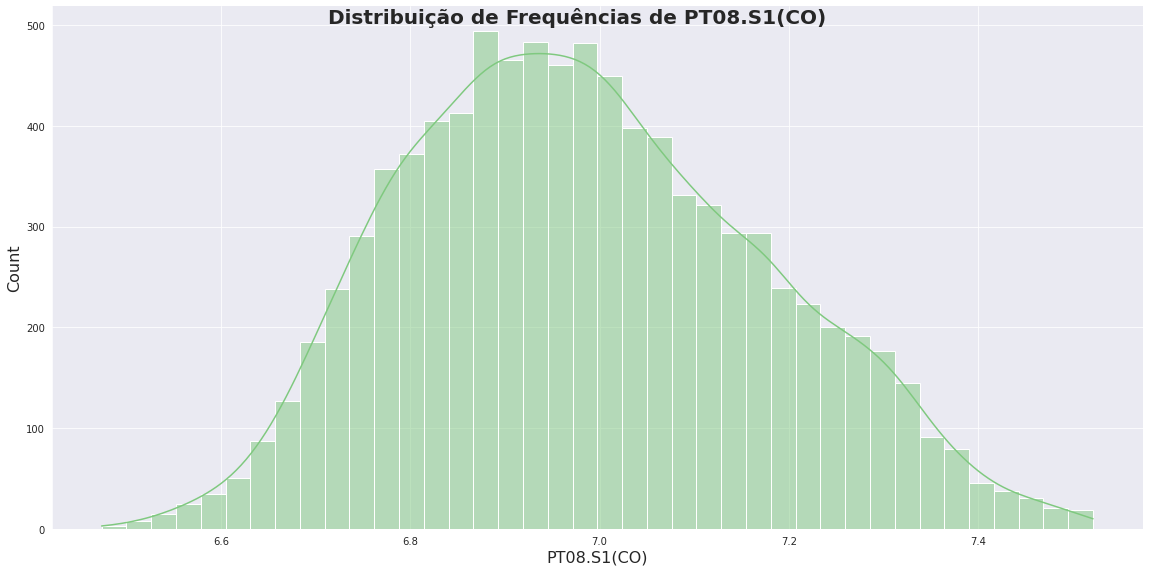

In [32]:
g = sns.displot(data = df_sem_outliers['log_PT08.S1(CO)'], height=8, aspect=2, kde=True)
g.fig.suptitle("Distribuição de Frequências de PT08.S1(CO)", fontsize=20, fontweight='bold')
g.set_xlabels('PT08.S1(CO)', fontsize = 16)
g.set_ylabels('Count', fontsize = 16)
g

## Dispersão entre as Variáveis

### Gráficos de dispersão entre as variáveis do dataset

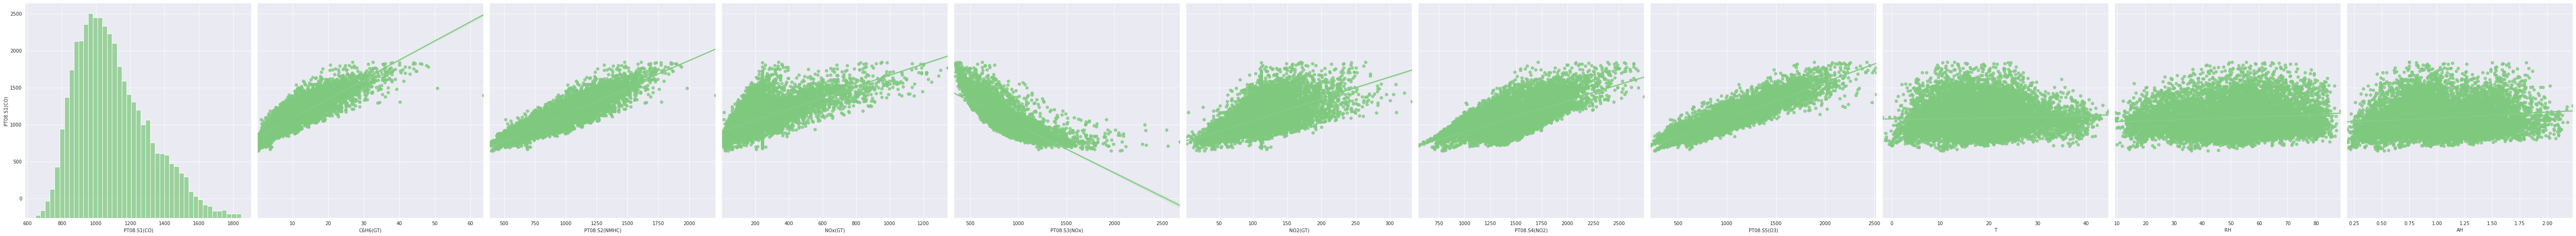

In [33]:
sns.pairplot(df_sem_outliers, y_vars='PT08.S1(CO)', x_vars=['PT08.S1(CO)', 'C6H6(GT)',
                                                            'PT08.S2(NMHC)','NOx(GT)',
                                                            'PT08.S3(NOx)', 'NO2(GT)',
                                                            'PT08.S4(NO2)', 'PT08.S5(O3)',
                                                            'T', 'RH', 'AH'],
             height = 7, kind='reg')

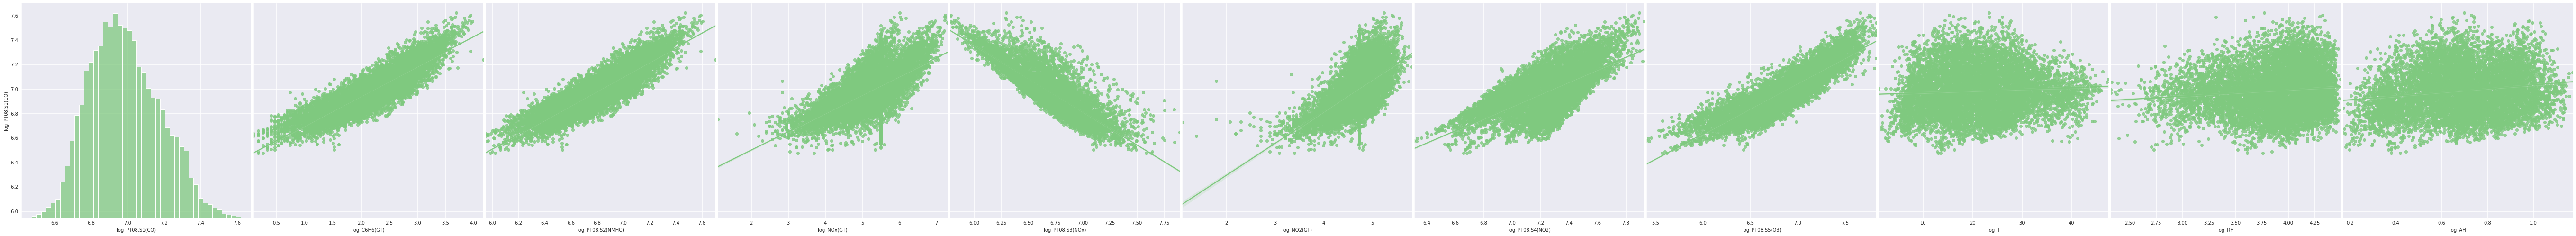

In [34]:
sns.pairplot(df_teste, y_vars='log_PT08.S1(CO)', x_vars=['log_PT08.S1(CO)', 'log_C6H6(GT)',
                                                     'log_PT08.S2(NMHC)','log_NOx(GT)',
                                                     'log_PT08.S3(NOx)', 'log_NO2(GT)',
                                                     'log_PT08.S4(NO2)', 'log_PT08.S5(O3)',
                                                     'log_T', 'log_RH', 'log_AH'], height = 7, kind='reg')

In [35]:
features_utilizadas = ['log_C6H6(GT)', 'log_PT08.S2(NMHC)','log_NOx(GT)',
                       'log_PT08.S3(NOx)', 'log_NO2(GT)', 'log_PT08.S4(NO2)',
                       'log_PT08.S5(O3)']
# , 'log_T', 'log_RH', 'log_AH'

# Criando os Datasets de Treino e Teste

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
y = df_sem_outliers['log_PT08.S1(CO)']
X = df_sem_outliers[features_utilizadas]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Importando a biblioteca statsmodels

In [39]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
X_train_com_constante = sm.add_constant(X_train)

In [41]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [42]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:        log_PT08.S1(CO)   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     5876.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):               0.00
Time:                        01:41:32   Log-Likelihood:                 8626.4
No. Observations:                7176   AIC:                        -1.724e+04
Df Residuals:                    7168   BIC:                        -1.718e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.0208      0.51

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [44]:
modelo = LinearRegression()

In [45]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
print(f'R² = {modelo.score(X_train, y_train).round(5)}')

R² = 0.85159


In [47]:
y_previsto = modelo.predict(X_test)

In [48]:
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(5)}')

R² = 0.85032


# Obtendo as previsões

In [49]:
# Obtendo apenas um dado de entrada
entrada = X_test[0:1]
entrada

,log_C6H6(GT),log_PT08.S2(NMHC),log_NOx(GT),log_PT08.S3(NOx),log_NO2(GT),log_PT08.S4(NO2),log_PT08.S5(O3)
8734,2.151762,6.783325,5.293305,6.459904,4.634729,7.081709,6.855409


In [50]:
previsao_pontual = modelo.predict(entrada)[0]
previsao_pontual

6.978982250542566

In [51]:
np.exp(previsao_pontual).round(2)

1073.82

In [52]:
np.exp(y_test[0:1])

8734    1202.0
Name: log_PT08.S1(CO), dtype: float64

# Interpretação dos Coeficientes Estimados

O intercepto representa o efeito médio em Y (Concentração de CO) tendo todas as variáveis explicativa excluída do modelo. Por causa da transformação logarítmica, devemos aplicar a exponencial para que o valor seja apresentado na mesma unidade do dataset

In [53]:
print(f'O valor da função se todos os parametros fosse zerados seria {np.exp(modelo.intercept_).round(3)}')

O valor da função se todos os parametros fosse zerados seria 0.002


<p>Os coeficientes angulares medem as elasticidades de Y em relação as variáveis utilizadas no modelo, isto é, a variação percentual de Y corresponde a uma dada variação percentual (pequena) em X2 e X3</p>

In [54]:
modelo.coef_

array([-0.75364217,  2.01436439, -0.00407195, -0.13476923,  0.03256476,
        0.07756406,  0.16764282])

In [55]:
features_utilizadas.append('Intercepto')
pd.DataFrame(data=np.append(modelo.coef_, modelo.intercept_), index = features_utilizadas, columns = ['Parâmetros'])

,Parâmetros
log_C6H6(GT),-0.753642
log_PT08.S2(NMHC),2.014364
log_NOx(GT),-0.004072
log_PT08.S3(NOx),-0.134769
log_NO2(GT),0.032565
log_PT08.S4(NO2),0.077564
log_PT08.S5(O3),0.167643
Intercepto,-6.020772


# Análise Gráfica dos Resultados do Modelo

In [56]:
y_previsto_train = modelo.predict(X_train)

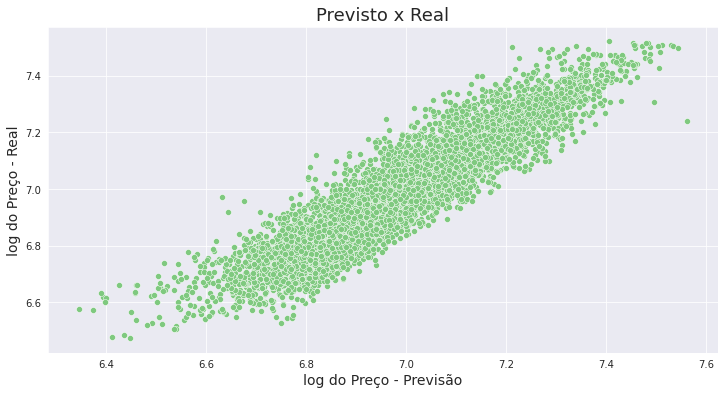

In [57]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title("Previsto x Real", fontsize = 18)
ax.set_xlabel("log do Preço - Previsão", fontsize = 14)
ax.set_ylabel("log do Preço - Real", fontsize = 14)
ax

In [58]:
residuo = y_train - y_previsto_train

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


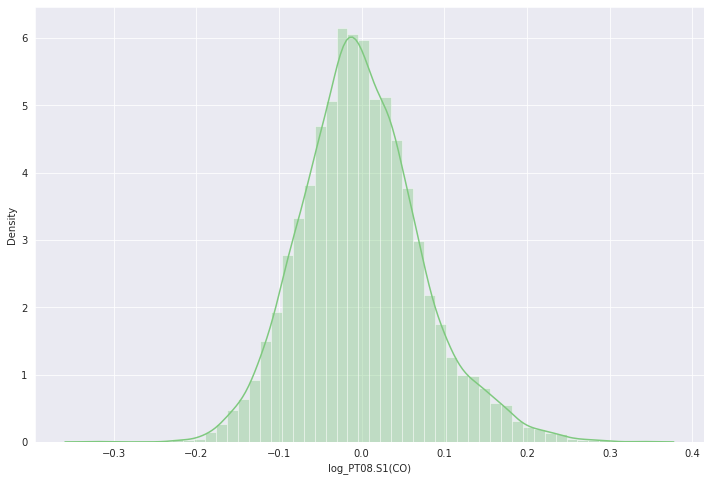

In [59]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12,8)